In [1]:
import fs
import pandas as pd
import tables
import json

In [2]:
from hdf5_getters import *
# from band_names import build_summary

In [3]:
root = fs.open_fs("MillionSongSubset")

In [4]:
# root.tree()

In [5]:
def build_summary(root, limit=100):
    result = {}
    files = root.walk.files()
    files = list(files)[:limit]
    for f in files:
        path = root.getsyspath(f)
        h5 = open_h5_file_read(path)
        artist = get_artist_name(h5)
        year = get_year(h5)
        h5.close()
        if artist in result:
            result[artist].add(year)
        else:
            result[artist] = {year}
    return result


In [6]:
def convert(s):
    s = {k.decode(): v - {0} for k, v in s.items() if v != 0}
    s = {k:v for k,v in s.items() if len(v) > 0}
    s = {k: [int(i) for i in v] for k, v in s.items()}
    return s

In [7]:
summary = build_summary(root, limit=None)

In [8]:
summary

{b'Sex Pistols': {0, 1977, 1988, 1998, 2004},
 b'Baby Rasta & Gringo': {0},
 b'Markus': {0},
 b'Charlie Byrd Trio': {0},
 b'Bedrock': {2004},
 b'Angela Dimitriou': {0},
 b'Alicia Keys': {2003, 2005, 2009},
 b'Joanna Connor': {0},
 b'Ghetto Mafia': {0},
 b'Free': {0, 1972},
 b'Frenchy': {0},
 b'Natassa Theodoridou': {0},
 b'Light Of The World': {0, 1980},
 b'[kaleidoskop]': {0},
 b'Suicidal Tendencies': {1987, 1992},
 b'Professor Longhair': {0, 1980, 1985, 1993},
 b'Rita Chiarelli': {0, 1992, 2004, 2006},
 b'Estopa': {0, 1999},
 b'Cristy Lane': {0},
 b'Vodka Collins': {0},
 b'Bo Carter': {0},
 b'Nicky B_ Na\xc3\xablle': {0},
 b'Fredericks_ Goldman_ Jones': {0},
 b'Aerosmith': {0, 1974, 1979, 1987, 1988, 1989, 1991, 1993},
 b'Sleepy John Estes': {1930, 1935, 1965, 1993},
 b'Steve Morse': {0, 2000},
 b'Roger Creager': {1998, 2003},
 b'bel canto': {1996},
 b'Dan Hicks': {0},
 b'Maracaibo 15': {0},
 b'Shade Sheist / N.U.N.E. / King Arthur': {0},
 b'Remy Shand': {2002},
 b'The Katinas': {0},

In [9]:
len(summary)

4412

In [10]:
s2 = convert(summary)

In [11]:
with open('summary.json', 'w') as f:
    json.dump(s2, f, indent=2)

In [12]:
with open('summary.json') as f:
    s2 = json.load(f)

In [13]:
s2

{'Sex Pistols': [1977, 2004, 1988, 1998],
 'Bedrock': [2004],
 'Alicia Keys': [2009, 2003, 2005],
 'Free': [1972],
 'Light Of The World': [1980],
 'Suicidal Tendencies': [1992, 1987],
 'Professor Longhair': [1985, 1980, 1993],
 'Rita Chiarelli': [1992, 2004, 2006],
 'Estopa': [1999],
 'Aerosmith': [1987, 1988, 1989, 1991, 1993, 1974, 1979],
 'Sleepy John Estes': [1993, 1930, 1965, 1935],
 'Steve Morse': [2000],
 'Roger Creager': [2003, 1998],
 'bel canto': [1996],
 'Remy Shand': [2002],
 'Daryl Hall & John Oates': [1976, 1988, 1990],
 'Elakelaiset': [1995, 1996],
 'Arc Angels': [1992],
 'The Distillers': [2000, 2003],
 'Bobby Valentin': [1970],
 'fIREHOSE': [1988, 1989, 1991],
 'Zombie Girl': [2009, 2006, 2007],
 'Yami Bolo': [2000, 2001],
 'Jars Of Clay': [2009, 2006],
 'John Mayall': [2002, 1970, 2007],
 'Lara Fabian': [2009, 1994],
 'Grandmaster Flash': [1987],
 'Liars': [2006, 2007],
 'Spliff': [1988, 1982],
 'Deftones': [2000, 2010, 2005, 1997],
 'Firehouse': [1992, 1990],
 'Les R

In [14]:
len(s2)

2238

In [15]:
s3 = {k:sorted(v)[0] for k,v in s2.items()}

In [16]:
s3

{'Sex Pistols': 1977,
 'Bedrock': 2004,
 'Alicia Keys': 2003,
 'Free': 1972,
 'Light Of The World': 1980,
 'Suicidal Tendencies': 1987,
 'Professor Longhair': 1980,
 'Rita Chiarelli': 1992,
 'Estopa': 1999,
 'Aerosmith': 1974,
 'Sleepy John Estes': 1930,
 'Steve Morse': 2000,
 'Roger Creager': 1998,
 'bel canto': 1996,
 'Remy Shand': 2002,
 'Daryl Hall & John Oates': 1976,
 'Elakelaiset': 1995,
 'Arc Angels': 1992,
 'The Distillers': 2000,
 'Bobby Valentin': 1970,
 'fIREHOSE': 1988,
 'Zombie Girl': 2006,
 'Yami Bolo': 2000,
 'Jars Of Clay': 2006,
 'John Mayall': 1970,
 'Lara Fabian': 1994,
 'Grandmaster Flash': 1987,
 'Liars': 2006,
 'Spliff': 1982,
 'Deftones': 1997,
 'Firehouse': 1990,
 'Les Rythmes Digitales feat. Nik Kershaw': 1999,
 'Daniel Johnston': 1982,
 'Casiotone For The Painfully Alone': 1999,
 'Will Ackerman': 1992,
 'Samy Deluxe': 2001,
 'Kai Winding': 1961,
 'Pat Metheny': 1979,
 'He Is Legend': 2006,
 'Funeral For A Friend': 2003,
 'Tresenlesen': 1995,
 'Hot Club Of Cow

In [17]:
the = {k:v for k,v in s2.items() if k.startswith("The")}

In [18]:
no_the = {k:v for k,v in s2.items() if not k.startswith("The")}

In [19]:
len(the), len(no_the)

(151, 2087)

In [20]:
sorted(the)

['The Abominable Iron Sloth',
 'The All American Rejects',
 'The All-American Rejects',
 'The Almost',
 'The Animals_ Sonny Boy Williamson',
 'The Antlers',
 'The Ataris',
 "The B-52's",
 'The Baltimore Consort',
 'The Balustrade Ensemble',
 'The Beatles / Tony Sheridan',
 'The Berzerker',
 'The Birds',
 'The Black Crowes',
 'The Blind Boys Of Alabama',
 'The Box Tops',
 'The Brooklyn Tabernacle Choir',
 'The Bucketheads',
 'The Bug Featuring Ricky Ranking',
 'The Bug Featuring Spaceape',
 'The Business',
 'The Cardigans',
 'The Cars',
 "The Cat's Miaow",
 'The Chap',
 'The Chi Lites',
 'The Chi-Lites',
 'The Chico Hamilton Quintet With Fred Katz_ Paul Horn_ John Pisano_ Carson Smith',
 'The Chieftains',
 'The Chieftains;Colin James',
 'The Clancy Brothers',
 'The Clash',
 'The Cliks',
 'The Cortinas',
 'The Creation',
 'The Crystal Method',
 'The Cure',
 'The Del McCoury Band',
 'The Dillinger Escape Plan',
 'The Disposable Heroes Of Hiphoprisy',
 'The Distillers',
 'The Doors',
 'The

In [21]:
df = pd.DataFrame({"artist":s3.keys(), "year":s3.values()})

In [22]:
df

,artist,year
0,Sex Pistols,1977
1,Bedrock,2004
2,Alicia Keys,2003
3,Free,1972
4,Light Of The World,1980
...,...,...
2233,Marcio Faraco,2002
2234,Lady GaGa,2008
2235,Tha Alkaholiks,1993
2236,PRE,2007


In [23]:
label = df.artist.str.startswith("The")

In [24]:
df["label"] = label

In [25]:
df

,artist,year,label
0,Sex Pistols,1977,False
1,Bedrock,2004,False
2,Alicia Keys,2003,False
3,Free,1972,False
4,Light Of The World,1980,False
...,...,...,...
2233,Marcio Faraco,2002,False
2234,Lady GaGa,2008,False
2235,Tha Alkaholiks,1993,False
2236,PRE,2007,False


In [37]:
df.label = df.label.apply(lambda b: "the" if b else "no_the")

In [38]:
df

,artist,year,label
0,Sex Pistols,1977,no_the
1,Bedrock,2004,no_the
2,Alicia Keys,2003,no_the
3,Free,1972,no_the
4,Light Of The World,1980,no_the
...,...,...,...
2233,Marcio Faraco,2002,no_the
2234,Lady GaGa,2008,no_the
2235,Tha Alkaholiks,1993,no_the
2236,PRE,2007,no_the


array([<AxesSubplot:title={'center':'no_the'}>,
       <AxesSubplot:title={'center':'the'}>], dtype=object)

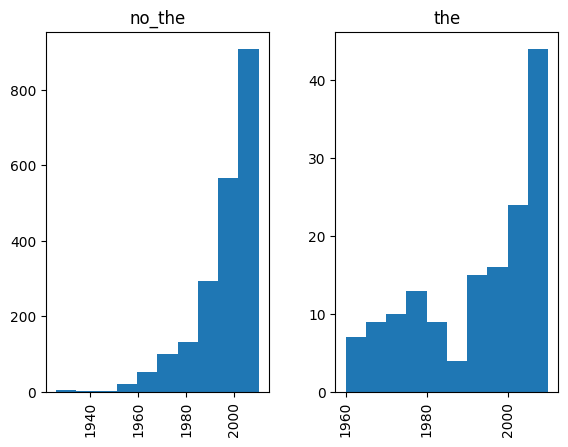

In [39]:
df.hist(column="year", by="label")